In [34]:
# modified from https://github.com/SherlockLiao/Deep-Dream/blob/master/show_image.ipynb
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
from deepDream import dream
import torch.nn as nn
import spectroUtils as sUtils
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import math
from torch.autograd import Variable
from network import *

import matplotlib.pyplot as plt

# Experiments with just amp model

In [35]:
#Original hip-hopaudio
trackId = 2
minAmp = -80.0
maxAmp = 1.9073486e-06
audioDirectory = "data/fma_small/"
audioFilename = audioDirectory + "000/000002.mp3"
x, sr = librosa.load(audioFilename, sr=None, mono=True, duration = 10, offset = 0)
start, end = 0, 30
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

scaledSpectro [[113 166 177 ... 207 198 195]
 [103 157 143 ... 172 149 171]
 [121 175 177 ... 180 181 173]
 ...
 [ 18  37  70 ...  56  60 124]
 [ 10  65  45 ...  63  65 124]
 [  0  66  59 ...  65  46 124]]


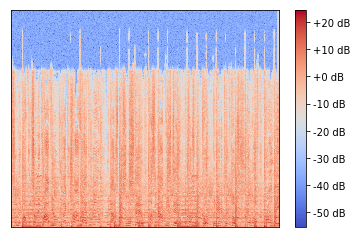

In [36]:
#scaledSpectro, phase, origSpectroSize = sUtils.loadSpectro(trackId, spectroSize, minAmp, maxAmp)
#scaledSpectro = scaledSpectro.data.numpy()
spectro = librosa.core.stft(x)
origMag, origPhase = librosa.core.magphase(spectro)
origSpectroSize = spectro.shape
spectroSize = (512, 512)
scaledSpectro = sUtils.scaleSpectro(librosa.power_to_db(np.abs(spectro)), spectroSize, minAmp, maxAmp)

print("scaledSpectro", scaledSpectro)

plt.figure()
librosa.display.specshow(librosa.power_to_db(np.abs(spectro)))
plt.colorbar(format='%+2.0f dB')
plt.show()

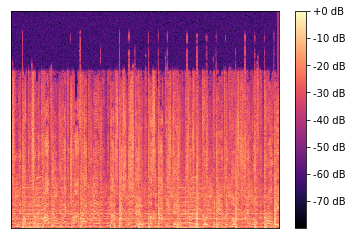

In [37]:
# Get the power spectrogram from decibal version
backToSpectro = librosa.power_to_db(sUtils.unscaleSpectro(scaledSpectro, origSpectroSize, minAmp, maxAmp))
plt.figure()
librosa.display.specshow(backToSpectro)
plt.colorbar(format='%+2.0f dB')
plt.show()

In [38]:
backToSpectro = librosa.core.db_to_power(backToSpectro)
n = len(x)
y_hat = librosa.istft(backToSpectro*origPhase, length = n)
ipd.Audio(data=y_hat[start*sr:end*sr], rate=sr)

In [39]:
librosa.output.write_wav('scaledExample.wav', y_hat, sr)

In [40]:
scaledSpectro = np.expand_dims(np.expand_dims(scaledSpectro, 0),0).astype(np.float32)

In [41]:
modelMag = resnet18(channel=1, num_classes=4).cuda()

1


In [42]:
checkpoint = torch.load('new_model/checkpoints/checkpoints_magnitude/checkpoints/model_best.pth.tar')
modelMag.load_state_dict(checkpoint['state_dict'])

modelMag = nn.Sequential(*list(modelMag.children())[:-3])

In [43]:
print ("scaledSpectro.shape", scaledSpectro.shape)
dreamSpectro = dream(modelMag, scaledSpectro)
dreamSpectro = dreamSpectro[0,0,:]
print ("dreamSpectro")
print (dreamSpectro.shape)

scaledSpectro.shape (1, 1, 512, 512)
model after removing 7
(1, 1, 95, 95)
ratio 0.054951433
learning_rate_use 7.279155019082548
imgBefore [[[[113.88408    180.1742     188.88684    ... 189.99768
    201.04405    195.10434   ]
   [110.580215   185.82446    188.57198    ... 204.01982
    204.97917    196.15823   ]
   [102.86464    181.69952    191.6863     ... 199.396
    207.6887     205.08255   ]
   ...
   [ 24.658346    59.56575     57.703503   ...  58.897247
     60.220066   124.08198   ]
   [ 20.624521    58.612225    57.617695   ...  57.864754
     59.90078    123.34137   ]
   [ -0.37713426  59.257042    59.438004   ...  56.72054
     57.650673   124.0179    ]]]]
imgAfter (1, 1, 95, 95)
ratio 0.057312578
learning_rate_use 6.97927076773798
imgBefore [[[[ 1.14057907e+02  1.80169098e+02  1.88822601e+02 ...  1.89609467e+02
     2.01470901e+02  1.95250381e+02]
   [ 1.10476822e+02  1.85792709e+02  1.88690964e+02 ...  2.04155624e+02
     2.05383530e+02  1.95952148e+02]
   [ 1.03115089e+0

/home/iaakhter/.conda/envs/mypy35/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


ratio 0.06586717
learning_rate_use 6.072828023440192
imgBefore [[[[112.19046    181.75699    191.7775     ... 187.87791
    201.9776     196.44933   ]
   [109.464874   185.86165    191.04234    ... 201.91113
    204.95403    196.92908   ]
   [100.54823    179.7733     190.57695    ... 197.16846
    208.39131    204.09575   ]
   ...
   [ 23.071459    60.196636    57.17586    ...  57.869186
     60.446056   123.66567   ]
   [ 18.220888    57.318985    57.14229    ...  58.277416
     59.088184   121.74493   ]
   [  0.84209067  58.5659      60.755802   ...  55.15152
     57.206383   123.21364   ]]]]
imgAfter (1, 1, 95, 95)
ratio 0.061659716
learning_rate_use 6.4872176762515705
imgBefore [[[[112.26692    181.7257     191.97173    ... 187.66026
    201.82097    196.28874   ]
   [109.45786    185.79266    190.93932    ... 201.66043
    204.69409    196.97426   ]
   [100.659775   180.07822    190.57486    ... 197.41507
    208.80711    204.18896   ]
   ...
   [ 23.502337    60.108326    57.459

ratio 0.055172674
learning_rate_use 7.24996576032008
imgBefore [[[[112.42486   176.6517    185.71066   ... 191.0044    209.85654
    195.69707  ]
   [106.907326  186.45647   187.05727   ... 206.69989   199.42194
    185.99736  ]
   [113.29891   175.47495   184.88432   ... 201.01852   206.29405
    212.86272  ]
   ...
   [ 20.185255   57.420364   54.76747   ...  58.317547   61.442036
    124.36327  ]
   [ 20.872139   57.314163   58.464584  ...  60.95979    56.63961
    124.0132   ]
   [  2.3368547  59.206287   58.94923   ...  57.633537   58.070557
    125.83262  ]]]]
imgAfter (1, 1, 133, 133)
ratio 0.05971833
learning_rate_use 6.698111009145869
imgBefore [[[[113.06277   176.61618   185.55244   ... 190.58551   209.19298
    195.77162  ]
   [107.25758   186.07637   186.70297   ... 206.46693   199.04796
    186.10956  ]
   [113.721016  175.35925   185.00203   ... 201.52058   206.40959
    213.35927  ]
   ...
   [ 20.554543   57.646152   54.80629   ...  58.943336   61.746338
    124.88352  

ratio 0.05909933
learning_rate_use 6.7682660676550634
imgBefore [[[[113.3381    179.20265   187.8059    ... 191.78743   212.44098
    194.73346  ]
   [106.95787   184.69386   184.49428   ... 208.71338   197.8021
    182.25696  ]
   [110.703186  173.44551   182.7426    ... 202.6656    205.56433
    214.31703  ]
   ...
   [ 22.374636   57.164364   54.552322  ...  60.825287   62.051422
    124.65263  ]
   [ 21.643255   57.06744    60.011944  ...  62.21841    57.60161
    124.03691  ]
   [  0.3092552  61.738113   61.01987   ...  56.73466    55.718105
    123.32348  ]]]]
imgAfter (1, 1, 133, 133)
ratio 0.05980286
learning_rate_use 6.688643316650479
imgBefore [[[[113.61083    179.29253    187.56331    ... 191.3029
    211.9336     194.76604   ]
   [107.420494   184.9858     184.69304    ... 208.35748
    197.92212    182.65002   ]
   [111.0178     173.55739    182.78032    ... 202.66891
    205.71803    214.57477   ]
   ...
   [ 22.850815    57.225487    54.34043    ...  60.74546
     61.891

ratio 0.06057048
learning_rate_use 6.603877174268159
imgBefore [[[[114.937    172.02007  175.93895  ... 214.99557  202.99927
    191.30008 ]
   [118.22125  171.57285  170.52081  ... 189.33018  178.95331
    161.33287 ]
   [109.66742  193.92247  176.11415  ... 209.9168   201.63022
    190.42151 ]
   ...
   [ 30.985203  61.169117  60.132248 ...  62.43074   57.887024
    123.2104  ]
   [ 13.11338   61.781807  56.28737  ...  58.453766  59.23519
    122.63803 ]
   [  4.735856  63.991673  64.86062  ...  67.214294  54.7234
    120.57757 ]]]]
imgAfter (1, 1, 261, 261)
ratio 0.05532749
learning_rate_use 7.229679137831895
imgBefore [[[[114.788216  172.59177   175.24573   ... 214.39807   201.37404
    190.79199  ]
   [118.980064  172.23543   171.47984   ... 188.70703   178.31992
    161.60507  ]
   [110.87896   193.8854    176.3827    ... 208.79192   201.84454
    191.39944  ]
   ...
   [ 31.382786   61.93545    59.860844  ...  63.088608   58.67122
    122.86693  ]
   [ 13.695526   62.112175   55

ratio 0.061199464
learning_rate_use 6.5360049661233015
imgBefore [[[[115.31521  169.18494  171.03603  ... 203.6727   194.96292
    189.5123  ]
   [115.83224  160.69566  164.04605  ... 178.48952  167.69275
    169.75555 ]
   [127.79079  188.39287  183.03354  ... 202.85176  194.47581
    153.88924 ]
   ...
   [  6.952361  57.034462  64.361465 ...  62.038464  63.201756
    123.47789 ]
   [ 15.183255  57.47227   66.96317  ...  57.989594  61.7344
    120.49815 ]
   [  4.041928  66.27526   57.731403 ...  63.10915   48.31777
    116.0679  ]]]]
imgAfter (1, 1, 366, 366)
ratio 0.06319781
learning_rate_use 6.329333600243143
imgBefore [[[[115.35853  169.20905  170.96951  ... 203.49446  194.83458
    189.38971 ]
   [115.73252  160.28232  163.89671  ... 178.24193  167.21564
    169.79677 ]
   [127.9207   187.96678  183.01144  ... 202.57127  194.23398
    154.36113 ]
   ...
   [  7.277657  57.404938  64.45822  ...  62.256485  63.29563
    123.3093  ]
   [ 15.484388  57.347584  66.88096  ...  58.5100

ratio 0.05649249
learning_rate_use 7.080587318335804
imgBefore [[[[117.24908   172.9289    170.43379   ... 201.30855   192.94511
    190.2625   ]
   [116.14016   162.81721   163.36879   ... 176.57375   165.63268
    171.244    ]
   [126.94838   187.21933   179.62868   ... 198.59552   190.4037
    153.5357   ]
   ...
   [  8.953334   59.471558   62.640682  ...  64.60616    67.43828
    123.26546  ]
   [ 17.493076   56.6296     67.14809   ...  63.03596    65.82268
    122.29303  ]
   [  6.6285615  69.06429    60.244953  ...  65.19293    46.17963
    115.103615 ]]]]
imgAfter (1, 1, 366, 366)
ratio 0.06388243
learning_rate_use 6.261502293812043
imgBefore [[[[117.78476   172.43631   169.30995   ... 200.66968   192.94994
    190.75327  ]
   [115.94148   162.94066   162.81482   ... 176.4807    165.8117
    171.72412  ]
   [127.172775  187.22769   179.14719   ... 199.19958   191.17235
    153.76057  ]
   ...
   [  8.61952    59.36079    62.651867  ...  64.397934   66.975464
    122.38397  ]
  

ratio 0.0553223
learning_rate_use 7.230357294487776
imgBefore [[[[121.02664  170.63695  176.95512  ... 197.98131  190.14618
    190.5121  ]
   [109.54492  161.12709  139.65266  ... 168.96078  146.78862
    169.09459 ]
   [125.998024 175.9061   172.12242  ... 178.88025  181.4349
    173.57689 ]
   ...
   [ 20.639355  41.765087  73.50695  ...  63.455605  63.542267
    120.28851 ]
   [ 16.56336   70.78405   49.10341  ...  66.05017   65.219124
    118.998024]
   [  8.725998  74.61065   66.16212  ...  62.629845  39.962753
    117.49909 ]]]]
imgAfter (1, 1, 512, 512)
ratio 0.05677562
learning_rate_use 7.045277738281638
imgBefore [[[[120.96205  170.67813  177.01015  ... 198.14034  190.36375
    190.42474 ]
   [109.321655 161.09938  139.75647  ... 169.05078  146.79257
    169.04607 ]
   [125.839554 175.9204   172.21893  ... 178.83632  181.40038
    173.57259 ]
   ...
   [ 20.676401  41.929     73.57713  ...  63.572853  63.612022
    120.32088 ]
   [ 16.488869  70.87571   49.250553 ...  66.1880

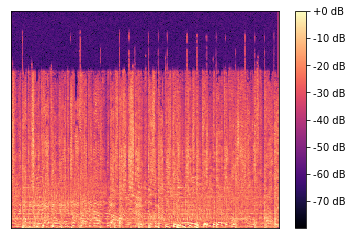

In [44]:
#Convert it back to 
backToSpectro = librosa.power_to_db(sUtils.unscaleSpectro(dreamSpectro, origSpectroSize, minAmp, maxAmp))
plt.figure()
librosa.display.specshow(backToSpectro)
plt.colorbar(format='%+2.0f dB')
plt.show()

In [45]:
backToSpectro = librosa.core.db_to_power(backToSpectro)
n = len(x)
y_hat = librosa.istft(backToSpectro*origPhase, length = n)
ipd.Audio(data=y_hat[start*sr:end*sr], rate=sr)

In [46]:
librosa.output.write_wav('dreamExample.wav', y_hat, sr)

## Noise Dream

In [47]:
noiseSpectro = np.random.random(spectroSize)*255
noisePhase = np.random.random(spectroSize)*2*math.pi - math.pi
backToNoiseSpectro = librosa.core.db_to_power(sUtils.unscaleSpectro(noiseSpectro, origSpectroSize, minAmp, maxAmp))
n = len(x)
y_hat = librosa.istft(backToNoiseSpectro*origPhase, length = n)
ipd.Audio(data=y_hat[start*sr:end*sr], rate=sr)


In [48]:
noiseSpectro = np.expand_dims(np.expand_dims(noiseSpectro, 0),0).astype(np.float32)

In [49]:
modelMag = resnet18(channel=1, num_classes=4).cuda()

1


In [50]:
checkpoint = torch.load('new_model/checkpoints/checkpoints_magnitude/checkpoints/model_best.pth.tar')
modelMag.load_state_dict(checkpoint['state_dict'])

modelMag = nn.Sequential(*list(modelMag.children())[:-3])

In [51]:
print ("noiseSpectro.shape", noiseSpectro.shape)
dreamNoiseSpectro = dream(modelMag, noiseSpectro)
dreamNoiseSpectro = dreamNoiseSpectro[0,0,:]
print ("dreamNoiseSpectro")
print (dreamNoiseSpectro)

noiseSpectro.shape (1, 1, 512, 512)
model after removing 7
(1, 1, 95, 95)
ratio 0.11665649
learning_rate_use 3.428870533740375
imgBefore [[[[233.36852  149.88358  142.6028   ... 123.25022  114.72581
     49.59401 ]
   [119.6092   131.55858  130.25449  ... 124.82816  133.40028
    116.15632 ]
   [130.88681  126.769424 123.460304 ... 121.79267  125.982544
    113.35923 ]
   ...
   [175.1708   137.77136  130.1427   ... 127.39444  114.84323
    146.5305  ]
   [151.80478  128.76047  123.42734  ... 115.580925 106.70745
    131.80525 ]
   [126.2024   143.44643  177.91432  ... 114.46064  119.78455
     74.566956]]]]
imgAfter (1, 1, 95, 95)
ratio 0.11064366
learning_rate_use 3.6152093207826006
imgBefore [[[[232.8666   149.92078  142.44296  ... 125.10006  116.149826
     51.693024]
   [120.10644  130.64824  131.13048  ... 126.77824  132.41455
    115.23599 ]
   [132.60472  126.49967  122.747345 ... 121.51507  124.7167
    114.82781 ]
   ...
   [175.49333  137.51575  130.4423   ... 127.67207  114

/home/iaakhter/.conda/envs/mypy35/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


ratio 0.102752194
learning_rate_use 3.8928609227095086
imgBefore [[[[227.56526  145.51286  142.576    ... 124.26838  116.59762
     56.78683 ]
   [116.22405  129.91554  129.30089  ... 125.82167  133.89386
    112.27261 ]
   [133.40417  126.34449  122.53077  ... 121.30626  124.86981
    113.0222  ]
   ...
   [174.0238   136.14665  130.91362  ... 127.334625 115.017235
    144.58128 ]
   [151.42105  128.31892  121.22791  ... 112.495186 107.67357
    129.5641  ]
   [128.51634  143.03093  176.14313  ... 116.84997  122.50364
     80.1904  ]]]]
imgAfter (1, 1, 95, 95)
ratio 0.1140042
learning_rate_use 3.508642596732257
imgBefore [[[[227.61766  145.23645  141.77837  ... 124.93611  117.35938
     56.202724]
   [116.613625 129.8081   129.6028   ... 126.43673  134.46455
    112.11687 ]
   [133.56403  126.677444 122.43564  ... 120.90689  124.45345
    112.24565 ]
   ...
   [173.98718  136.25264  131.45226  ... 127.663216 114.70018
    143.60896 ]
   [151.72098  128.73495  121.65062  ... 112.84579 

ratio 0.11334021
learning_rate_use 3.529197736168809
imgBefore [[[[224.85583  129.55743  167.2731   ... 101.48256  127.86825
     55.732   ]
   [116.324234 115.44326  131.03514  ... 134.80965  134.23447
    127.8297  ]
   [117.443016 142.75032  127.70905  ... 138.63872  132.67828
     91.384796]
   ...
   [192.8466   128.85696  105.38728  ... 125.52896  111.147316
    112.31128 ]
   [125.45037  134.63405  126.84469  ...  89.26289  109.92262
    140.2434  ]
   [128.11108  134.75229  154.14896  ... 135.11284  112.91154
     79.88011 ]]]]
imgAfter (1, 1, 133, 133)
ratio 0.10935678
learning_rate_use 3.657752064554885
imgBefore [[[[224.63179  129.41199  167.04782  ... 101.795135 128.05035
     56.012787]
   [116.483635 116.029274 131.01822  ... 134.3301   134.66643
    127.988914]
   [117.86216  142.79977  127.50088  ... 139.07115  133.00595
     91.89253 ]
   ...
   [192.76581  128.70184  105.32055  ... 125.33095  111.10148
    112.03123 ]
   [125.21218  134.756    126.878784 ...  89.2447 

ratio 0.104770504
learning_rate_use 3.817868435909706
imgBefore [[[[223.96342  112.34407  155.02716  ... 172.56438   95.13628
     54.710835]
   [ 96.70021  114.57788   88.65742  ... 119.56495  148.11423
    152.47739 ]
   [134.03468  134.35817  131.57088  ... 104.38776  136.36343
     87.95163 ]
   ...
   [171.27493  139.44753  144.31105  ...  84.7128   138.84836
    127.447754]
   [ 91.01483  127.33341  131.90585  ...  91.19473  105.22221
    149.51701 ]
   [122.8704   148.9477   110.659065 ...  66.7166   143.07912
     78.03166 ]]]]
imgAfter (1, 1, 186, 186)
ratio 0.10733571
learning_rate_use 3.726625589887241
imgBefore [[[[223.91974  111.85616  154.62648  ... 172.64163   94.95959
     54.75821 ]
   [ 96.699715 114.46922   88.76501  ... 119.6269   148.5695
    152.59317 ]
   [134.0094   134.82037  131.3951   ... 104.5648   136.7601
     87.652374]
   ...
   [171.57274  139.5629   144.41986  ...  84.37131  138.4444
    127.473656]
   [ 90.75029  127.249596 131.32088  ...  91.16566  1

ratio 0.093364954
learning_rate_use 4.28426280831765
imgBefore [[[[224.43161  141.64717   65.07656  ...  59.970936 117.90432
     53.58954 ]
   [ 85.30141  129.95062   93.6902   ... 152.95091  139.14781
    136.90459 ]
   [108.09713  119.18558  101.42474  ... 124.37972  160.76099
    176.69461 ]
   ...
   [ 94.255745 141.53603  170.18143  ...  57.720657  95.518486
    100.101036]
   [ 91.35741  111.67159  113.35472  ... 100.00514  141.62643
    187.09438 ]
   [122.3467   128.45457  178.31168  ... 110.88545  162.68596
     79.555916]]]]
imgAfter (1, 1, 261, 261)
ratio 0.09378975
learning_rate_use 4.264858419126984
imgBefore [[[[224.01404  141.61742   64.624245 ...  59.995144 117.9703
     54.10555 ]
   [ 85.22969  129.83562   93.29919  ... 152.76804  138.50847
    137.17564 ]
   [108.072395 118.456566 100.70293  ... 123.97871  159.90988
    176.16365 ]
   ...
   [ 93.838196 141.73708  169.64606  ...  57.616234  95.39676
     99.54157 ]
   [ 91.266396 111.64826  113.65844  ... 100.407684

ratio 0.080039516
learning_rate_use 4.997531463627189
imgBefore [[[[226.8951   206.33109   49.01672  ... 161.62964   89.21599
     57.882435]
   [ 74.01946  159.2882    69.24533  ... 159.20085  127.082405
     91.33106 ]
   [106.63329  183.80142   72.48919  ... 119.76268  155.63153
    211.70981 ]
   ...
   [ 67.06935   82.25269  122.005615 ...  76.6878   170.39467
    242.53435 ]
   [105.96518  119.83049  114.58012  ... 122.20847  159.61037
    142.78403 ]
   [124.461     96.75954  172.3293   ...  77.888885 216.63602
     80.65758 ]]]]
imgAfter (1, 1, 366, 366)
ratio 0.08088312
learning_rate_use 4.945407462765346
imgBefore [[[[225.79672  206.55334   47.265026 ... 161.96088   89.16156
     57.482735]
   [ 72.80657  158.56247   67.692955 ... 159.06786  127.2698
     90.34395 ]
   [104.80573  183.81819   71.42569  ... 119.34769  154.72281
    210.2963  ]
   ...
   [ 67.143234  82.56394  121.92916  ...  76.400085 170.45436
    242.076   ]
   [105.8823   120.320694 114.60973  ... 122.56494

ratio 0.063166216
learning_rate_use 6.3324990038954825
imgBefore [[[[225.23294  242.1744   144.87236  ... 157.83264   40.675747
     59.001286]
   [ 68.26799  174.28853   78.01322  ... 107.46295  170.1978
     42.31891 ]
   [ 83.084496 171.81262  215.54579  ... 133.50076   77.16869
    164.25351 ]
   ...
   [176.23439   72.98981   62.00414  ... 123.859764 177.21367
    234.32162 ]
   [ 58.15945  247.84464   14.760973 ... 201.4461   143.82745
     84.05934 ]
   [123.77253  105.45315   85.00939  ... 163.6059   250.9451
     82.43367 ]]]]
imgAfter (1, 1, 512, 512)
ratio 0.062972546
learning_rate_use 6.351974436443213
imgBefore [[[[225.45656  242.299    144.86407  ... 157.72581   40.68749
     59.051033]
   [ 68.68138  174.59222   77.36679  ... 107.86898  170.32425
     42.187016]
   [ 83.30494  172.4091   214.86366  ... 133.7516    77.66127
    164.22165 ]
   ...
   [177.00288   73.637665  62.28988  ... 124.04601  178.10995
    235.08562 ]
   [ 57.77016  248.13647   14.259813 ... 201.8131

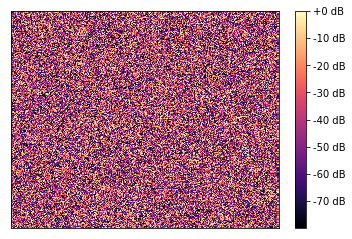

In [52]:
backToSpectro = librosa.power_to_db(sUtils.unscaleSpectro(dreamNoiseSpectro, origSpectroSize, minAmp, maxAmp))
plt.figure()
librosa.display.specshow(backToSpectro)
plt.colorbar(format='%+2.0f dB')
plt.show()

In [53]:
backToSpectro = librosa.core.db_to_power(backToSpectro)
n = len(x)
y_hat = librosa.istft(backToSpectro*origPhase, length = n)
ipd.Audio(data=y_hat[start*sr:end*sr], rate=sr)

In [54]:
librosa.output.write_wav('dreamNoiseExample.wav', y_hat, sr)

## Control The Dream

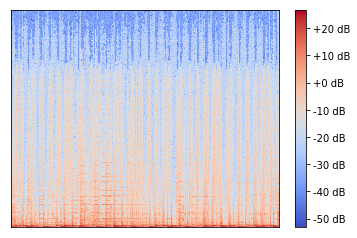

In [55]:
#spectroSize = 224
otherTrackId = 1482
audioFilename = audioDirectory + "001/001482.mp3"
x, sr = librosa.load(audioFilename, sr=None, mono=True, duration = 10, offset = 0)

otherSpectro = librosa.core.stft(x)
origSpectroSize = spectro.shape
spectroSize = (512, 512)
otherScaledSpectro = librosa.power_to_db(np.abs(otherSpectro))

plt.figure()
librosa.display.specshow(otherScaledSpectro)
plt.colorbar(format='%+2.0f dB')
plt.show()


In [56]:
otherScaledSpectro = sUtils.scaleSpectro(otherScaledSpectro, spectroSize, minAmp, maxAmp)
#otherScaledPhase = sUtils.scaleSpectro(np.angle(otherSpectro), spectroSize, -math.pi, math.pi)

start, end = 0, 10
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

In [57]:
modelMag = resnet18(channel=1, num_classes=4).cuda()
checkpoint = torch.load('new_model/checkpoints/checkpoints_magnitude/checkpoints/model_best.pth.tar')
modelMag.load_state_dict(checkpoint['state_dict'])

modelMag = nn.Sequential(*list(modelMag.children())[:-5])

1


In [58]:
otherScaledSpectro = torch.Tensor(np.expand_dims(np.expand_dims(otherScaledSpectro, 0),0).astype(np.float32)).cuda()
otherScaledSpectro = Variable(otherScaledSpectro)

control_features_mag = modelMag.forward(otherScaledSpectro)
control_features_mag = control_features_mag.cpu().data.numpy()

In [59]:
def objective_guide(dst, guide_features):
    x = dst.data[0].cpu().numpy().copy()
    #print ("guide_features", guide_features.shape)
    y = guide_features
    ch,w, h = x.shape
    #ch = 1
    x = x.reshape(ch,-1)
    y = y.reshape(ch,-1)
    print ("shape of x", x.shape)
    print ("shape of y", y.shape)
    #A = x.T.dot(y) # compute the matrix of dot-products with guide features
    #A = torch.mm(torch.from_numpy(x.T).type(torch.DoubleTensor), torch.from_numpy(y).type(torch.DoubleTensor)).numpy()
    #A = np.zeros((x.shape[1],y.shape[1]))
    '''maxColumnIndices = []
    batchSize = 9000
    numBatches = x.shape[1]//batchSize
    for batchNum in range(numBatches):
        start = batchNum*batchSize
        end = start+batchSize
        if batchNum == numBatches-1:
            end = x.shape[1]
        #print ("x portion shape", (x[0,start:end].T).shape)
        #print ("y portion shape", (y).shape)
        prod = np.dot((x[0,start:end].T).reshape(-1,1), y)
        argMax = prod.argmax(1)
        for val in list(argMax):
            maxColumnIndices.append(val)
        del prod
    #print ("shape of A", A.shape)
    #result = y[:,A.argmax(1)] # select ones that match best
    #print ("shape of result", result.shape)
    result = y[:,maxColumnIndices]'''
    A = x.T.dot(y) # compute the matrix of dot-products with guide features
    result = y[:,A.argmax(1)] # select ones that match best
    print ("shape of result", result.shape)
    if torch.cuda.is_available():
        result = torch.Tensor(np.array([result.reshape(ch, w, h)], dtype=np.float)).cuda()
    else:
        result = torch.Tensor(np.array([result.reshape(ch, w, h)], dtype=np.float))
    return result

In [60]:
hopRockDreamSpectro = dream(modelMag, scaledSpectro, control=control_features_mag, distance=objective_guide, layerNumber=3)
print(hopRockDreamSpectro)

model after removing 5
(1, 1, 95, 95)
shape of x (64, 576)
shape of y (64, 16384)
shape of result (64, 576)
ratio 0.21312815
learning_rate_use 1.8768051096052043
imgBefore [[[[1.12441887e+02 1.78802139e+02 1.87417633e+02 ... 1.89830383e+02
    2.00786377e+02 1.95246445e+02]
   [1.08564186e+02 1.84515533e+02 1.88801956e+02 ... 2.04770111e+02
    2.05255035e+02 1.96071716e+02]
   [1.02062111e+02 1.81040451e+02 1.93629654e+02 ... 1.98931152e+02
    2.07838837e+02 2.05091446e+02]
   ...
   [2.54785786e+01 5.92088737e+01 5.71951790e+01 ... 5.86682701e+01
    6.01117630e+01 1.25602242e+02]
   [2.11405048e+01 5.76709824e+01 5.66566963e+01 ... 5.76648026e+01
    5.98261261e+01 1.24592590e+02]
   [7.59869069e-02 5.85133209e+01 5.93871346e+01 ... 5.65821419e+01
    5.79106369e+01 1.24253983e+02]]]]
imgAfter (1, 1, 95, 95)
shape of x (64, 576)
shape of y (64, 16384)
shape of result (64, 576)
ratio 0.23526606
learning_rate_use 1.7002027432986089
imgBefore [[[[ 1.12094147e+02  1.78275894e+02  1.864

/home/iaakhter/.conda/envs/mypy35/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)



shape of result (64, 576)
ratio 0.20955849
learning_rate_use 1.9087749956766695
imgBefore [[[[1.09974396e+02 1.76971832e+02 1.85789597e+02 ... 1.90167221e+02
    2.02816498e+02 1.93502670e+02]
   [1.05507668e+02 1.82230225e+02 1.89516815e+02 ... 2.07155792e+02
    2.08237732e+02 1.94230179e+02]
   [9.84394760e+01 1.78655853e+02 1.94725662e+02 ... 1.98326538e+02
    2.09121628e+02 2.03558899e+02]
   ...
   [2.64518814e+01 5.99697647e+01 5.77045593e+01 ... 6.00142593e+01
    6.06360664e+01 1.26323647e+02]
   [2.05803337e+01 5.72344933e+01 5.69234810e+01 ... 5.76239243e+01
    6.01000671e+01 1.24929192e+02]
   [1.66179851e-01 5.71398048e+01 5.87444344e+01 ... 5.51813545e+01
    5.78060188e+01 1.25562119e+02]]]]
imgAfter (1, 1, 95, 95)
shape of x (64, 576)
shape of y (64, 16384)
shape of result (64, 576)
ratio 0.20980883
learning_rate_use 1.9064974852329881
imgBefore [[[[110.28635    176.69452    185.88593    ... 189.6623
    202.7531     193.24362   ]
   [105.52525    181.50467    188.82

shape of result (64, 576)
ratio 0.1776034
learning_rate_use 2.252209214346255
imgBefore [[[[ 1.0979087e+02  1.7269104e+02  1.8131482e+02 ...  1.9513841e+02
     2.0783644e+02  1.9501524e+02]
   [ 1.0233449e+02  1.7507225e+02  1.8960126e+02 ...  2.1640633e+02
     2.1519821e+02  1.9332401e+02]
   [ 8.9489021e+01  1.7210616e+02  1.9760933e+02 ...  2.0205850e+02
     2.0536540e+02  1.9538026e+02]
   ...
   [ 3.1735653e+01  6.0340370e+01  5.7902092e+01 ...  6.3873817e+01
     6.5932358e+01  1.2816377e+02]
   [ 2.0807302e+01  5.4853016e+01  5.8718212e+01 ...  5.7637733e+01
     6.0063717e+01  1.2563096e+02]
   [-1.3820267e-01  5.4327267e+01  5.7557251e+01 ...  5.1288601e+01
     5.6319759e+01  1.2614258e+02]]]]
imgAfter (1, 1, 95, 95)
(1, 1, 133, 133)
shape of x (64, 1156)
shape of y (64, 16384)
shape of result (64, 1156)
ratio 0.20204838
learning_rate_use 1.979723903343529
imgBefore [[[[1.09823097e+02 1.70114151e+02 1.76704483e+02 ... 1.96659241e+02
    2.13542740e+02 1.94662354e+02]
   [1

shape of result (64, 1156)
ratio 0.18401939
learning_rate_use 2.1736840178885792
imgBefore [[[[108.595695  167.77419   176.75685   ... 203.12302   225.59962
    196.79173  ]
   [ 98.295654  173.19733   179.69586   ... 233.36075   218.08603
    182.17744  ]
   [ 99.8647    159.88258   180.39308   ... 210.4935    210.48047
    205.09229  ]
   ...
   [ 26.263132   63.192047   57.96557   ...  63.40953    68.031425
    129.14594  ]
   [ 20.914595   54.37873    56.098366  ...  59.28638    60.31301
    130.45438  ]
   [ -0.3760085  53.02598    52.55089   ...  48.93205    63.951786
    129.89056  ]]]]
imgAfter (1, 1, 133, 133)
shape of x (64, 1156)
shape of y (64, 16384)
shape of result (64, 1156)
ratio 0.18320085
learning_rate_use 2.183395970246944
imgBefore [[[[ 1.0782040e+02  1.6694345e+02  1.7709035e+02 ...  2.0425266e+02
     2.2631190e+02  1.9648689e+02]
   [ 9.7608780e+01  1.7262067e+02  1.7994464e+02 ...  2.3442438e+02
     2.1893382e+02  1.8254256e+02]
   [ 9.8945335e+01  1.5890244e+0

ratio 0.20207213
learning_rate_use 1.9794911978476837
imgBefore [[[[106.13336    163.10918    171.6367     ... 230.82082
    224.1206     196.19543   ]
   [101.282135   168.2923     168.80823    ... 233.9657
    207.77058    172.86937   ]
   [ 85.68964    180.48883    179.61429    ... 229.8679
    207.9953     191.36916   ]
   ...
   [ 35.38877     60.50746     61.207676   ...  64.20206
     65.54442    134.38618   ]
   [ 16.759207    52.844414    56.159946   ...  60.222
     64.35801    133.76202   ]
   [ -0.48027256  51.672947    53.4886     ...  54.509697
     72.55192    130.23524   ]]]]
imgAfter (1, 1, 186, 186)
shape of x (64, 2209)
shape of y (64, 16384)
shape of result (64, 2209)
ratio 0.18560976
learning_rate_use 2.1550591117897633
imgBefore [[[[1.06193611e+02 1.62918640e+02 1.72104095e+02 ... 2.30857300e+02
    2.24268936e+02 1.96281357e+02]
   [1.00773895e+02 1.68000397e+02 1.68342224e+02 ... 2.33787186e+02
    2.08131546e+02 1.72506134e+02]
   [8.61232147e+01 1.80301071e+02

shape of result (64, 2209)
ratio 0.18586782
learning_rate_use 2.1520670342869432
imgBefore [[[[103.706436 159.56671  174.5868   ... 234.01566  230.4072
    196.37325 ]
   [ 96.351944 169.49902  175.51651  ... 237.84694  210.05652
    169.18373 ]
   [ 85.30987  181.0425   181.63557  ... 231.74542  205.03325
    186.70628 ]
   ...
   [ 38.56404   62.79447   64.394455 ...  67.02853   68.081566
    138.12372 ]
   [ 16.834904  51.558556  58.186646 ...  62.42927   67.148544
    138.02577 ]
   [  1.019975  47.951122  52.46634  ...  53.84713   76.49442
    133.48302 ]]]]
imgAfter (1, 1, 186, 186)
shape of x (64, 2209)
shape of y (64, 16384)
shape of result (64, 2209)
ratio 0.18233855
learning_rate_use 2.1937215059200184
imgBefore [[[[1.0356947e+02 1.5967761e+02 1.7574826e+02 ... 2.3371657e+02
    2.3068126e+02 1.9690645e+02]
   [9.5376801e+01 1.6982806e+02 1.7615610e+02 ... 2.3770897e+02
    2.1118549e+02 1.6909619e+02]
   [8.5506378e+01 1.8135185e+02 1.8217526e+02 ... 2.3182503e+02
    2.0606

shape of result (64, 4356)
ratio 0.18831003
learning_rate_use 2.124156669255833
imgBefore [[[[ 99.91032    153.3145     164.96915    ... 237.0208
    224.46814    196.70299   ]
   [ 96.453514   160.21486    168.51595    ... 216.56082
    195.97559    159.72871   ]
   [ 85.73211    183.38675    173.56253    ... 226.64821
    205.36203    175.94557   ]
   ...
   [ 34.750053    58.888527    59.59777    ...  69.4107
     70.58326    140.72508   ]
   [  8.492681    48.995663    48.506145   ...  67.00284
     75.06856    143.11023   ]
   [  0.47359943  48.01124     48.096897   ...  80.30583
     77.662125   135.28258   ]]]]
imgAfter (1, 1, 261, 261)
shape of x (64, 4356)
shape of y (64, 16384)
shape of result (64, 4356)
ratio 0.1867305
learning_rate_use 2.1421245664446515
imgBefore [[[[ 99.77553   153.93265   165.1931    ... 237.26204   224.83063
    196.1715   ]
   [ 95.984924  159.57758   168.6273    ... 218.86731   196.1906
    159.58061  ]
   [ 84.09146   182.25902   173.5454    ... 227.

shape of result (64, 8464)
ratio 0.17959702
learning_rate_use 2.22720844514921
imgBefore [[[[ 98.617256  148.77719   154.81836   ... 233.50766   221.20374
    200.07835  ]
   [ 89.535965  140.77505   154.49411   ... 198.8354    179.1803
    166.71616  ]
   [ 97.11575   169.96405   177.56773   ... 212.83107   193.70349
    139.19875  ]
   ...
   [  8.288013   51.261616   59.556057  ...  72.14638    79.500114
    148.10571  ]
   [ 14.565267   45.186172   53.550957  ...  72.24298    82.72278
    146.19536  ]
   [  1.8420401  53.414413   40.68623   ...  84.259926   73.536194
    139.28142  ]]]]
imgAfter (1, 1, 366, 366)
shape of x (64, 8464)
shape of y (64, 16384)
shape of result (64, 8464)
ratio 0.18650886
learning_rate_use 2.144670183865997
imgBefore [[[[ 98.182915  147.06732   154.20306   ... 234.79868   221.31023
    200.62341  ]
   [ 89.039665  140.09737   154.49269   ... 198.898     178.60419
    166.7418   ]
   [ 98.06484   170.2543    178.18013   ... 212.37424   192.72491
    138.5

shape of y (64, 16384)
shape of result (64, 8464)
ratio 0.17522411
learning_rate_use 2.282790872185614
imgBefore [[[[ 96.56204  145.64929  155.9406   ... 239.07796  227.70052
    203.5454  ]
   [ 82.422195 135.72917  157.06721  ... 201.03174  177.44392
    163.1614  ]
   [ 95.58288  166.88788  179.65405  ... 208.89513  189.15001
    133.12251 ]
   ...
   [ 11.902796  55.461277  65.362045 ...  75.44036   84.86631
    152.94981 ]
   [ 15.487531  44.60418   56.547436 ...  75.16761   85.82046
    150.87453 ]
   [  2.986545  53.16031   42.22896  ...  87.340904  78.22981
    141.2325  ]]]]
imgAfter (1, 1, 366, 366)
shape of x (64, 8464)
shape of y (64, 16384)
shape of result (64, 8464)
ratio 0.17681724
learning_rate_use 2.2622228679511656
imgBefore [[[[ 96.43988   144.81314   155.58818   ... 238.33691   228.21342
    204.39955  ]
   [ 82.5499    135.02104   157.09822   ... 200.80727   176.62798
    163.19904  ]
   [ 95.56252   167.1661    180.56516   ... 209.12201   188.93951
    132.96355  

shape of y (64, 16384)
shape of result (64, 16384)
ratio 0.17977999
learning_rate_use 2.224941700385194
imgBefore [[[[ 93.24519  134.90479  150.36671  ... 235.9495   221.02214
    203.23672 ]
   [ 75.69614  127.88857  122.82596  ... 192.76942  158.43335
    166.2747  ]
   [ 93.49492  147.33986  161.54982  ... 185.13182  175.03522
    152.90236 ]
   ...
   [ 25.814585  34.704613  68.778854 ...  78.818726  87.79248
    154.10338 ]
   [ 17.32184   59.688763  38.699898 ...  84.96262   92.4101
    153.26941 ]
   [  9.179294  60.171284  48.16658  ...  91.262955  74.06842
    148.37894 ]]]]
imgAfter (1, 1, 512, 512)
shape of x (64, 16384)
shape of y (64, 16384)
shape of result (64, 16384)
ratio 0.18240313
learning_rate_use 2.1929447971291576
imgBefore [[[[ 93.10617  135.06818  150.94019  ... 236.16745  221.7165
    203.28822 ]
   [ 74.71423  127.017365 123.35949  ... 192.65115  158.18224
    165.92285 ]
   [ 92.65683  147.17732  162.82455  ... 184.97615  175.0138
    152.4777  ]
   ...
   [ 2

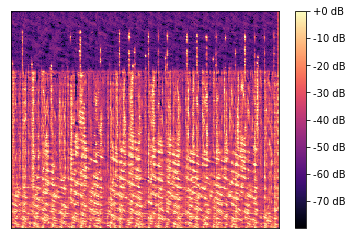

In [61]:
hopRockDreamSpectro = hopRockDreamSpectro[0,0,:]
backToSpectro = librosa.power_to_db(sUtils.unscaleSpectro(hopRockDreamSpectro, origSpectroSize, minAmp, maxAmp))

plt.figure()
librosa.display.specshow(backToSpectro)
plt.colorbar(format='%+2.0f dB')
plt.show()


In [62]:
backToSpectro = librosa.core.db_to_power(backToSpectro)
n = len(x)
y_hat = librosa.istft(backToSpectro*origPhase, length = n)
ipd.Audio(data=y_hat[start*sr:end*sr], rate=sr)

In [63]:
librosa.output.write_wav('dreamExampleControl.wav', y_hat, sr)